<a href="https://colab.research.google.com/github/Lidiamir/ExemplosML/blob/main/Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clusterização: Técnica para identificação de grupos de semelhança nos dados

Cluster é um termo em inglês que significa agrupamento ou aglomerado. No contexto do aprendizado de máquina (do inglês *machine learning*), o termo é utilizado para denominar as técnicas estatísticas que têm por finalidade propor agrupamentos em dados de acordo com a semelhança entre eles.

Para melhor compreensão, imagine um cenário em que uma vendedora tem que organizar roupas em um estande de uma feira. Ela recebe uma caixa com todas roupas juntas e depois as separa nas prateleiras e cabides. Ao organizar as roupas, a vendedora coloca juntos os itens que ela considera parecidos de modo que fique mais fácil encontrar o que se procura. O algoritmo de clusterização desempenha um papel parecido com o da vendedora, pois ele recebe um conjunto de dados desorganizados e propõe uma organização dos dados em grupos de semelhança.

É importante ressaltar que a clusterização é normalmente usada sobre dados não rotulados, isto é, dados que não possuem alguma classificação/organização previamente feita. As técnicas que não demandam rotulação prévia dos dados são chamadas de técnicas de aprendizado não supervisionado.

A clusterização pode ser muito útil tanto auxiliando na compreensão dos dados, quanto viabilizando a organização e sanitização de grandes conjuntos de dados.

## Exemplos práticos

Existem várias técnicas de clusterização, podendo uma ser mais adequada do que a outra, dependendo das características dos dados. Nesse exemplo, é utilizada a técnica [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), que é uma técnica amplamente utilizada e simples de compreender, para resolver o problema da organização das roupas mencionado anteriormente. Usaremos a implementação feita pela [Scikit Learn](https://scikit-learn.org/stable/index.html), uma famosa biblioteca de aprendizado de máquina em Python.

Como o algoritmo precisa receber os dados em formato digital. Vamos mostrar a execução da técnica para alguns formatos de dados diferentes, do mais simples para o mais complexo. 

A figura abaixo representa o conjunto de roupas que o algoritmo vai organizar.

['/content/sample_data/figuras_roupas/01.png', '/content/sample_data/figuras_roupas/02.png', '/content/sample_data/figuras_roupas/03.png', '/content/sample_data/figuras_roupas/04.png', '/content/sample_data/figuras_roupas/05.png', '/content/sample_data/figuras_roupas/06.png', '/content/sample_data/figuras_roupas/07.png', '/content/sample_data/figuras_roupas/08.png', '/content/sample_data/figuras_roupas/09.png', '/content/sample_data/figuras_roupas/10.png', '/content/sample_data/figuras_roupas/11.png', '/content/sample_data/figuras_roupas/12.png', '/content/sample_data/figuras_roupas/13.png', '/content/sample_data/figuras_roupas/14.png', '/content/sample_data/figuras_roupas/15.png', '/content/sample_data/figuras_roupas/16.png']


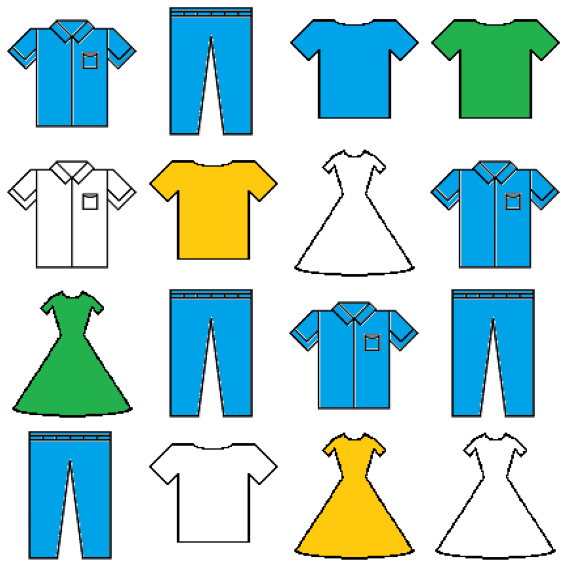

In [32]:
import numpy as np  #Biblioteca para criação de estruturas de dados e funnções de processamento matemático em Python
import matplotlib.pyplot as plt #Biblioteca para construção de gráficos e visualizações em Python
import matplotlib.image as mpimg 

# função para leitura de um conjunto de imagens
def load_images(paths):
    tmp = []
    for path in paths:
        tmp.append(mpimg.imread(path))
    return tmp

# função para leitura de um conjunto de imagens em reduz elas para 1 dimensão
def load_images_flatten(paths):
    tmp = []
    for path in paths:
        tmp.append(mpimg.imread(path).flatten())
    return tmp
  
# Função para exibir as imagens
def plot_images(arr, rows = 1, columns = 16, title = ''):
  if (len(arr)> (rows * columns)):
    rows = 1
    columns = len(arr)
  plt.figure(figsize = (columns*2, rows*2))
  for i in range(len(arr)):
    plt.subplot(rows, columns,i + 1)
    if (title == ''): 
      plt.title(title)
    else:
      plt.title(title[i])
    plt.imshow(arr[i])
    plt.axis("off")

diretorio_roupas = ['/content/sample_data/figuras_roupas/01.png', '/content/sample_data/figuras_roupas/02.png', '/content/sample_data/figuras_roupas/03.png', '/content/sample_data/figuras_roupas/04.png', '/content/sample_data/figuras_roupas/05.png', '/content/sample_data/figuras_roupas/06.png', '/content/sample_data/figuras_roupas/07.png', '/content/sample_data/figuras_roupas/08.png', '/content/sample_data/figuras_roupas/09.png', '/content/sample_data/figuras_roupas/10.png', '/content/sample_data/figuras_roupas/11.png', '/content/sample_data/figuras_roupas/12.png', '/content/sample_data/figuras_roupas/13.png', '/content/sample_data/figuras_roupas/14.png', '/content/sample_data/figuras_roupas/15.png', '/content/sample_data/figuras_roupas/16.png']
print(diretorio_roupas)
imagens_roupas = load_images(diretorio_roupas)
plot_images(imagens_roupas, 4, 4) 

### Exemplo 1: Dados tabulares

Neste primeiro exemplo, o algoritmo vai receber somente informações sobre o tipo da roupa e sua cor, que serão representadas por um par de números [*código do tipo*, *código da cor*], conforme códigos presentes na tabela abaixo.

| Código Tipo| Descrição Tipo |  | Código Cor| Descrição Cor | 
| --- | ----- | | --- | ----------- | 
| 1 | blusa  | | 10 | verde    | 
| 2 | camisa | | 20 | amarela  | 
| 3 | calça  | | 30 | azul     | 
| 4 | vestido | | 40 | branco   | 

Abaixo podemos ver como cada roupa do conjunto será representada. Podemos observar que o código [2,30] representa uma camisa azul, enquanto o código [1,10] representa uma blusa verde e assim por diante. O total de imagens é representado pelo *array* [[4,20],[2,30],[1,10],[2,30],[4,40],[4,10],[3,30],[3,30],[1,30],[4,40],[3,30],[2,40],[2,30],[1,40],[1,20],[3,30]].

<ipython-input-32-7e097a11985b>:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (title == ''):
/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


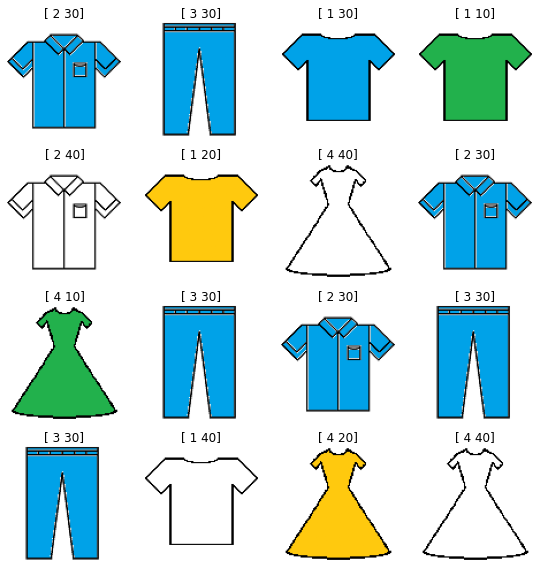

In [33]:
# Array com dados sobre as roupas
roupas = np.array([[2,30],[3,30],[1,30],[1,10],[2,40],[1,20],[4,40],[2,30],[4,10],[3,30],[2,30],[3,30],[3,30],[1,40],[4,20],[4,40]]) 

plot_images(imagens_roupas, 4, 4, roupas)

Uma vez definido o conjunto de dados de entrada, em seguida os dados são redimensionados (colocados em uma mesma escala) para que as variáveis fiquem proporcionais umas a outras e assim uma variável não tenha um peso maior que a outra na decisão. No exemplo, se não fosse feito o redimensionamento, a variável cor teria mais influência na definição dos agrupamentos do que a variável tipo, simplesmente pelos valores absolutos dos códigos de cor serem maiores do que os códigos de tipo. 

In [34]:
from sklearn.preprocessing import StandardScaler

# Função que redimensiona as variáveis 
scaler = StandardScaler() 
scaled_roupas = scaler.fit_transform(roupas)

scaled_roupas # array de roupas redmimensionado

array([[-0.4472136 ,  0.13483997],
       [ 0.4472136 ,  0.13483997],
       [-1.34164079,  0.13483997],
       [-1.34164079, -2.02259959],
       [-0.4472136 ,  1.21355975],
       [-1.34164079, -0.94387981],
       [ 1.34164079,  1.21355975],
       [-0.4472136 ,  0.13483997],
       [ 1.34164079, -2.02259959],
       [ 0.4472136 ,  0.13483997],
       [-0.4472136 ,  0.13483997],
       [ 0.4472136 ,  0.13483997],
       [ 0.4472136 ,  0.13483997],
       [-1.34164079,  1.21355975],
       [ 1.34164079, -0.94387981],
       [ 1.34164079,  1.21355975]])

Em seguida é estabelecido o quantitativo de grupos em que os dados serão divididos e é criado um modelo estatístico K-Means onde os dados são submetidos. O modelo então propõe o agrupamento dos dados, de acordo com o quantitativo de grupos estabelecido.

In [35]:
from sklearn.cluster import KMeans #Biblioteca que implementa a técnica Kmeans 

number_cluster = 4 # Quantidade grupos que os dados serão divididos.

# Criando modelo Kmeans
kmeans = KMeans(
    init="random",
    n_clusters= number_cluster,
    n_init=10,
    max_iter=300,
    random_state=42
    )

# Modelo aprendendo padrão sobre os dados
kmeans.fit(scaled_roupas)

# Array resultante do algoritmo Kmeans com o grupo de cada roupa
kmeans.labels_[:]

array([0, 1, 0, 2, 0, 2, 1, 0, 3, 1, 0, 1, 1, 0, 3, 1], dtype=int32)

A figura abaixo mostra as imagens organizadas em seus respectivos grupos. 

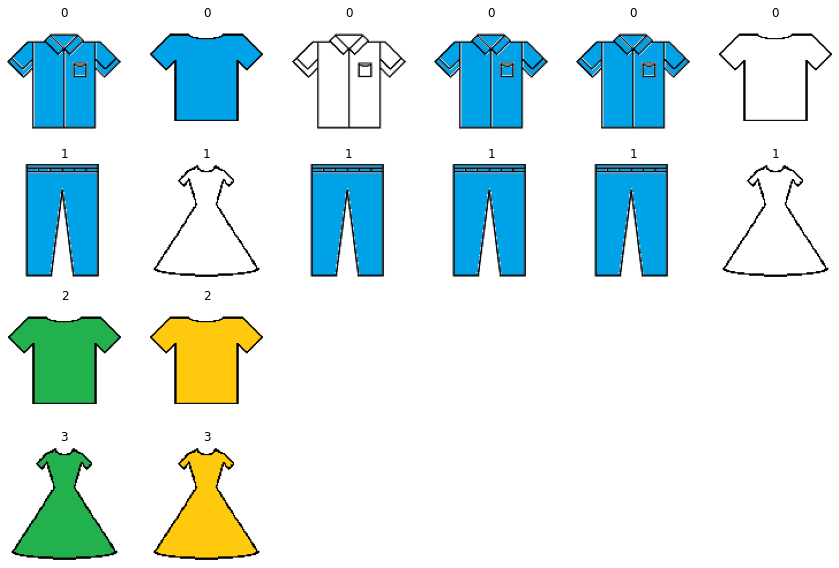

In [36]:
# Função para exibir imagens nos grupos
def plot_images_groups(arr, clusters):
  num_clusters = len(np.unique(clusters))
  
  columns = 0
  for i in range(num_clusters):
    total = np.count_nonzero(clusters == i)
    if total > columns:
      columns = total
  
  plt.figure(figsize=(columns*2, num_clusters*2))

  for k in range(num_clusters):
    j = k*columns
    for i in range(len(arr)):
      if (clusters[i] == k):
        j += 1
        ax = plt.subplot(num_clusters, columns, j)
        plt.imshow(arr[i])
        plt.title(clusters[i])
        plt.axis("off")

plot_images_groups(imagens_roupas, kmeans.labels_)

#### Como o algoritmo de clusterização funciona?
É interessante observar que o algoritmo conseguiu organizar as roupas em conjuntos coesos. Mas é difícil entender o motivo que levou o algoritmo colocar os vestidos brancos no grupo com as calças azuis e não no grupo dos vestidos verde e amarelo. Para melhor uso da técnica de clusterização a fim de obter resultados mais próximos aos desejados é importante entender melhor o funcionamento do algoritmo. 

Para isso, foram dispostos no gráfico abaixo os pares de códigos [código do tipo, código da cor] correspondente a cada roupa. No caso das roupas que se repetem, como é o caso da blusa azul (código [2,30]), o ponto no gráfico fica mais escuro. 

O gráfico expressa como o algoritmo enxerga as roupas. Ele considera mais parecidas as roupas que estão mais próximas entre si no gráfico e propõe os agrupamentos com base nessas posições. As cores dos pontos correspondem aos grupos propostos pelo algoritmo K-Means. Agora faz mais sentido o vestido branco (código [4,40]) ficar no mesmo grupo da calça azul (código [3,30]) e não no grupo dos outros dois vestidos. Se o código usado para a cor branca fosse 30 ao invés de 40, o vestido branco poderia ter sido agrupado junto com os outros vestidos. Por meio desse exemplo, é possível observar como a representação da informação impacta no comportamento do algoritmo. 

Destaca-se a importância da estapa de redimensionamento dos dados (colocar os dados em uma mesma escala), pois isto impacta no cálculo de distâncias. No nosso exemplo, o código da cor é numericamente maior do que o código do tipo, então, se o redimensionamento não tivesse sido feito, a cor teria um maior peso na formação dos grupos do que o tipo.

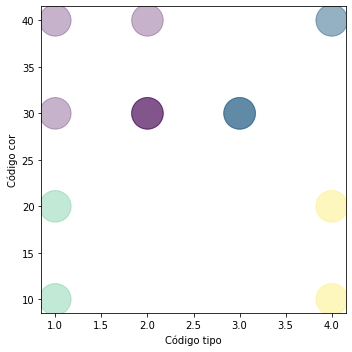

In [37]:
plt.rcParams["figure.figsize"] = [5.0, 5.00]
plt.rcParams["figure.autolayout"] = True
plt.xlabel("Código tipo")
plt.ylabel("Código cor")

plt.scatter(roupas[:, 0], roupas[:, 1], alpha=.3, c=kmeans.labels_, marker='o', s=1000)

plt.show()

De forma mais técnica, o algoritmo K-Means funciona da seguinte forma. Primeiramente, ele propõe pontos aleatórios (chamados de centroides) no gráfico e calcula a distância destes pontos a todos os outros pontos do gráfico (os pontos formados pelos dados originais). Depois disso ele forma grupos dos pontos mais próximos aos centroides. Então ele recalcula o centroide o colocando na posição central dos pontos no grupo. O algoritmo então repete o processo anterior de calcular a distância de todos os pontos aos centroides, propor novos grupos e calcular novos centroides até que os grupos formados não mudem de uma iteração para a outra.

Como os pontos iniciais propostos são aleatórios, esses pontos podem não ser ideais, trazendo um resuldo indesejado. Por isso, ao criar o modelo no K-Means no Sklearn existe o parâmetro *max_iter* que possibilita que algoritmo de clusterização seja executado mais de uma vez com pontos iniciais em posições diferentes aumentando assim a chance de obtenção de um melhor resultado.

O quantitativo de pontos iniciais propostos pelo algoritmo corresponde ao número de grupos definidos pelo usuário.

```
kmeans = KMeans(
    init="random",
    n_clusters= number_cluster,
    n_init=10,
    max_iter=300, # Quantidade máxima de iterações
    random_state=42
    )
```



### Exemplo 2: Dados tabulares de texto e mais dimensões

Neste segundo exemplo será mostrado um cenário em que os dados são recebidos por meio de um arquivo em formato CSV, que é uma notação muito utilizada para representar dados tabulares. Abaixo é apresentada uma tabela e logo em seguida são exibidas as mesmas informações no formato CSV. 

| tipo | cor | tamanho |
| --- | --- | --- |
| camisa | azul | grande |
| calça | azul | media |

```
tipo,cor,tamanho
camisa,azul,grande
calça,azul,media
```

O aplicativo Microsoft Excel disponibiliza uma função para salvar os dados em formato CSV. 

Agora os dados recebidos estão em formato texto e não mais numéricos. Também foi incluída a variável tamanho, que agora passa a ser considerada na formação do agrupamento.

In [38]:
import pandas as pd # Biblioteca Python para analise de dados e manipulação de dados

# Leitura dos dados do aquivo CSV
data = pd.read_csv("/content/sample_data/figuras_roupas/roupas.csv")
data.head()

,tipo,cor,tamanho
0,camisa,azul,grande
1,calça,azul,media
2,blusa,azul,media
3,blusa,verde,media
4,camisa,branca,grande


Após os dados terem sido carregados, é necessário que os dados do tipo texto sejam representados de forma numérica para que o algoritmo de clusterização consiga processá-los.

Existem algumas formas de realizar essa atividade, uma delas é usar um algoritmo para definir o número que representará cada palavra.

In [39]:
# Importando LabelEncoder do Sklearn
# Modulo da biblioteca para preprocessamento.
from sklearn.preprocessing import LabelEncoder
 
# Creando um label Encoder.
le = LabelEncoder()
 
# Definindo os números
label = le.fit_transform(data.tipo)
data["cat_tipo"] = label
 
data.head()

,tipo,cor,tamanho,cat_tipo
0,camisa,azul,grande,2
1,calça,azul,media,1
2,blusa,azul,media,0
3,blusa,verde,media,0
4,camisa,branca,grande,2


Um outra opção é definir o número que representará cada palavra. Isso pode ser interessante quando se quer dar uma noção de grandeza entre as categorias. Por exemplo, quando se trata de tamanho, é interessante que o número que representa o tamanho grande seja maior do que o número que representa o tamanho pequeno.

In [40]:
# Foi criada uma nova coluna onde constarão os valores numericos para os tipos de roupa
data['cat_tamanho'] = data['tamanho'].replace(['pequena', 'media', 'grande'], [0, 1, 2], inplace=False)
data.head()

,tipo,cor,tamanho,cat_tipo,cat_tamanho
0,camisa,azul,grande,2,2
1,calça,azul,media,1,1
2,blusa,azul,media,0,1
3,blusa,verde,media,0,1
4,camisa,branca,grande,2,2


Mais uma possibilidade é criar uma coluna para cada categoria representada na coluna e preencher com o valor 1 a coluna correspondente à categoria desejada. Esta alternativa não é recomenda para situações em que existem muitas categorias diferentes em uma mesma coluna.  

In [41]:
cat_cor = pd.get_dummies(data.cor)

# Concatenate the dummies to original dataframe
data = pd.concat([data, cat_cor], axis='columns')
data.head()

,tipo,cor,tamanho,cat_tipo,cat_tamanho,azul,branca,laranja,verde
0,camisa,azul,grande,2,2,1,0,0,0
1,calça,azul,media,1,1,1,0,0,0
2,blusa,azul,media,0,1,1,0,0,0
3,blusa,verde,media,0,1,0,0,0,1
4,camisa,branca,grande,2,2,0,1,0,0


Depois de converter os dados de texto em numéricos é necessário redimensionar os dados.  

In [42]:
from sklearn.preprocessing import StandardScaler

# Função que redimensiona as variáveis 
scaler = StandardScaler() 
scaled_roupas = scaler.fit_transform(data.filter(items=['cat_tipo', 'cat_cor', 'cat_tamanho']))

scaled_roupas # array de roupas redmimensionado

array([[ 0.62554324,  1.12089708],
       [-0.20851441, -0.16012815],
       [-1.04257207, -0.16012815],
       [-1.04257207, -0.16012815],
       [ 0.62554324,  1.12089708],
       [-1.04257207,  1.12089708],
       [ 1.4596009 , -1.44115338],
       [-1.04257207,  1.12089708],
       [ 1.4596009 , -1.44115338],
       [-0.20851441,  1.12089708],
       [-1.04257207, -0.16012815],
       [-0.20851441,  1.12089708],
       [-0.20851441, -1.44115338],
       [-1.04257207, -0.16012815],
       [ 1.4596009 , -1.44115338],
       [ 1.4596009 , -0.16012815]])

Uma vez os dados pré-processados, os dados são submetidos ao algoritmo K-Means. 

In [43]:
from sklearn.cluster import KMeans #Biblioteca que implementa a técnica Kmeans 

number_cluster = 4 # Quantidade grupos que os dados serão divididos.

# Criando modelo Kmeans
kmeans = KMeans(
    init="random",
    n_clusters= number_cluster,
    n_init=10,
    max_iter=300,
    random_state=42
    )

# Modelo aprendendo padrão sobre os dados
kmeans.fit(scaled_roupas)

# Array resultante do algoritmo Kmeans com o grupo de cada roupa
kmeans.labels_[:]

array([0, 1, 1, 1, 0, 2, 3, 2, 3, 2, 1, 2, 1, 1, 3, 3], dtype=int32)

A figura abaixo mostra as imagens organizadas de acordo com os grupos definidos pelo algoritmo. Reparem que o elemento tamanho impactou no resultado dos agrupamentos de modo que algumas roupas mesmo sendo do mesmo tipo e cor, foram agrupadas em função do do tamanho. 

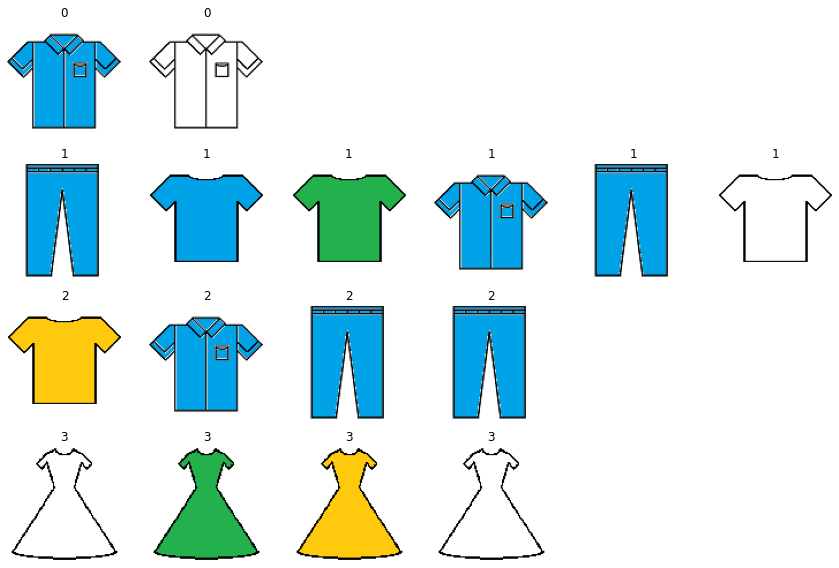

In [44]:
plot_images_groups(imagens_roupas, kmeans.labels_)